In [47]:
from msmarco.download import minimarco
from time import perf_counter
import numpy as np
import pandas as pd
from msmarco.evaluate import grade_results, judge_queries

minmarco_mrr10 = [0] * 5
REBUILD=False
NUM_QUERIES = 1000

In [48]:
minim, minim_judgments = minimarco(size=NUM_QUERIES, rebuild=REBUILD)
minim

,msmarco_id,url,title,body
0,D312959,https://en.wikipedia.org/wiki/Visual_cortex,Visual cortex,"From Wikipedia, the free encyclopedianavigatio..."
1,D140227,http://www.webmd.com/depression/electroconvuls...,Electroconvulsive Therapy (ECT),Electroconvulsive Therapy (ECT)Treatment Overv...
2,D213890,https://en.wikipedia.org/wiki/Cholera,Cholera,"From Wikipedia, the free encyclopedianavigatio..."
3,D1033338,https://answers.yahoo.com/question/index?qid=2...,The ABO blood type system in humans is an exam...,Science & Mathematics Biology The ABO blood ty...
4,D508131,http://www.healthline.com/health/beriberi,What is beriberi?,What is beriberi? Beriberi is a disease caused...
...,...,...,...,...
2304559,D1794588,https://rsvpify.com/wedding-rsvp-wording/,Wedding RSVP Wording Ideas and Format â 2017 E...,"April 20, 2017Wedding RSVP Wording Ideas and F..."
1261480,D528885,http://www.hemlockgorge.org/,Hemlock Gorge,Welcometo the Home Page of the Friends of Heml...
894047,D2027801,http://www.youtube.com/watch?v=utPqPCw8S00,Easy Tricks That Build Calves Fast,Easy Tricks That Build Calves Fast Seniority H...
3035513,D1019218,https://www.merriam-webster.com/dictionary/pos...,position,1positionnoun po·si·tion \ pə-ˈzi-shən \Popula...


In [49]:
minim_judgments

,query_id,query,msmarco_id
0,3,another name for the primary visual cortex is,D312959
1,5,ect is a treatment that is used for,D140227
2,12,rice-water stools are associated with disease...,D213890
3,15,the abo blood types are examples of,D1033338
4,16,the vitamin that prevents beriberi is,D508131
...,...,...,...
995,4806,ketamine infusion side effects,D806650
996,4810,kirby puckett baseball cards value,D999913
997,4811,klinefelter syndrome is an consequence of what...,D732799
998,4826,lasa catagories,D1424340


In [50]:
from searcharray import SearchArray
from msmarco.tokenizers import snowball_tokenizer

minim['title_snowball'] = SearchArray.index(minim['title'], tokenizer=snowball_tokenizer)
minim['body_snowball'] = SearchArray.index(minim['body'], tokenizer=snowball_tokenizer)

minim

,msmarco_id,url,title,body,title_snowball,body_snowball
0,D312959,https://en.wikipedia.org/wiki/Visual_cortex,Visual cortex,"From Wikipedia, the free encyclopedianavigatio...","Terms({'cortex', 'visual'})","Terms({'between', 'neurophysiolog', 'orm', 'wi..."
1,D140227,http://www.webmd.com/depression/electroconvuls...,Electroconvulsive Therapy (ECT),Electroconvulsive Therapy (ECT)Treatment Overv...,"Terms({'ect', 'electroconvuls', 'therapi'})","Terms({'physiolog', 'onlin', 'effect', 'than',..."
2,D213890,https://en.wikipedia.org/wiki/Cholera,Cholera,"From Wikipedia, the free encyclopedianavigatio...",Terms({'cholera'}),"Terms({'74', 'between', 'accept', 'snow', 'mic..."
3,D1033338,https://answers.yahoo.com/question/index?qid=2...,The ABO blood type system in humans is an exam...,Science & Mathematics Biology The ABO blood ty...,"Terms({'blood', 'the', 'is', 'system', 'exampl...","Terms({'onlin', 'websit', 'polymorph', 'type',..."
4,D508131,http://www.healthline.com/health/beriberi,What is beriberi?,What is beriberi? Beriberi is a disease caused...,"Terms({'is', 'what', 'beriberi'})","Terms({'doe', 'type', 'purchas', 'high', 'is',..."
...,...,...,...,...,...,...
2304559,D1794588,https://rsvpify.com/wedding-rsvp-wording/,Wedding RSVP Wording Ideas and Format â 2017 E...,"April 20, 2017Wedding RSVP Wording Ideas and F...","Terms({'2017', 'and', 'format', 'word', 'â', '...","Terms({'20', '2017', 'and', '2017wed', 'format..."
1261480,D528885,http://www.hemlockgorge.org/,Hemlock Gorge,Welcometo the Home Page of the Friends of Heml...,"Terms({'gorg', 'hemlock'})","Terms({'between', 'written', 'mile', 'declar',..."
894047,D2027801,http://www.youtube.com/watch?v=utPqPCw8S00,Easy Tricks That Build Calves Fast,Easy Tricks That Build Calves Fast Seniority H...,"Terms({'calv', 'easi', 'that', 'trick', 'build...","Terms({'i', 'isnt', 'if', 'excus', 'consist', ..."
3035513,D1019218,https://www.merriam-webster.com/dictionary/pos...,position,1positionnoun po·si·tion \ pə-ˈzi-shən \Popula...,Terms({'posit'}),"Terms({'between', 'brace', 'snow', 'slavon', '..."


In [51]:
def or_query_search(corpus, fields, query, query_id=None, n=10):
    if not isinstance(fields, list):
        fields = [fields]
    start = perf_counter()
    scored = np.zeros(len(corpus))
    for field in fields:
        boost = 1.0
        if '^' in field:
            field, boost = field.split('^')
            boost = float(boost)
        tokenizer = corpus[field].array.tokenizer
        tokens = tokenizer(query)
        scored += (np.sum([corpus[field].array.score(token) for token in tokens], axis=0) * boost)
    took = perf_counter() - start
    
    top_n_idx = np.argsort(scored)[::-1][:n]
    scores = scored[top_n_idx]
    top_n_idx, scores

    top_n = corpus[['title', 'msmarco_id']].iloc[top_n_idx]
    top_n['scores'] = scores
    top_n['query'] = query
    top_n['query_id'] = query_id
    top_n['took'] = took
    top_n['rank'] = np.arange(n) + 1
    return top_n

or_query_search(corpus=minim, fields="title_snowball", query="cheese inside")

,title,msmarco_id,scores,query,query_id,took,rank
2206782,Shaking Inside,D272394,4.525233,cheese inside,None,0.002116,1
741051,SMOKED CHEESE,D2825273,3.958058,cheese inside,None,0.002116,2
2475345,Renal-safe Macaroni and Cheese,D3471613,3.275180,cheese inside,None,0.002116,3
1406053,Philly Cheese Steak Sandwiches,D3143895,3.275180,cheese inside,None,0.002116,4
1057881,Inside Airbnbâs New San Francisco Headquarters,D2596811,3.193526,cheese inside,None,0.002116,5
2751295,Inside Kelly Ayotte's fight for survival,D3164816,3.193526,cheese inside,None,0.002116,6
2752904,Vegan Cashew Cheese (Stupidly Easy!),D2949551,3.015085,cheese inside,None,0.002116,7
562,"Do Milk, Cheese & Yogurt Have Carbohydrates?",D1324826,2.793262,cheese inside,None,0.002116,8
2322190,Calories in Salami and Cheese Sandwich,D1985612,2.793262,cheese inside,None,0.002116,9
1209870,9 cheeses not made from cow's milk,D3083621,2.601841,cheese inside,None,0.002116,10


## Title search

Just search title w/ BM25

In [52]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim, fields='title_snowball', query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

,title,msmarco_id,scores,query,query_id,took,rank
0,Visual cortex,D312959,9.712187,another name for the primary visual cortex is,3,0.001998,1
2688513,What is another word for pen name?,D255020,7.039500,another name for the primary visual cortex is,3,0.001998,2
698775,Search for another ZIP Code,D3441318,4.661566,another name for the primary visual cortex is,3,0.001998,3
150233,primary productivity,D962942,4.525233,another name for the primary visual cortex is,3,0.001998,4
957,Visual communication,D999777,4.294182,another name for the primary visual cortex is,3,0.001998,5
...,...,...,...,...,...,...,...
3169074,MALAWI SALARY,D2922025,3.187463,lgps definition final salary,4829,0.000302,6
2147546,Paralegal Salaries,D1992342,3.187463,lgps definition final salary,4829,0.000302,7
2602680,Definition,D1039622,2.958066,lgps definition final salary,4829,0.000302,8
688,Definition,D90500,2.958066,lgps definition final salary,4829,0.000302,9


In [53]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[0] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[0]

0.5511444444444444

## Body search

In [54]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim, fields='body_snowball', query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

,title,msmarco_id,scores,query,query_id,took,rank
0,Visual cortex,D312959,11.593686,another name for the primary visual cortex is,3,0.045856,1
1564008,.,D1874002,8.299027,another name for the primary visual cortex is,3,0.045856,2
823875,What happens when we dream?,D1613253,7.705410,another name for the primary visual cortex is,3,0.045856,3
927,Brain Structures and their Functions,D10666,7.391504,another name for the primary visual cortex is,3,0.045856,4
820415,Does Color Even Exist?,D2894277,7.121673,another name for the primary visual cortex is,3,0.045856,5
...,...,...,...,...,...,...,...
1725040,Total Remuneration,D1876162,4.485892,lgps definition final salary,4829,0.001314,6
2628376,ALTER TABLE Statement (Microsoft Access SQL),D2995855,4.384942,lgps definition final salary,4829,0.001314,7
211,27th amendment,D1601407,4.321597,lgps definition final salary,4829,0.001314,8
1476878,Escrow Assistant Salary,D2992688,4.319798,lgps definition final salary,4829,0.001314,9


In [55]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[1] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[1]

0.778593253968254

## Body plus title

Body and title together

In [56]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball', 'title_snowball'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

,title,msmarco_id,scores,query,query_id,took,rank
0,Visual cortex,D312959,21.305873,another name for the primary visual cortex is,3,0.025222,1
2688513,What is another word for pen name?,D255020,9.537623,another name for the primary visual cortex is,3,0.025222,2
1872315,What is the name of C# compiler?,D3298785,9.115857,another name for the primary visual cortex is,3,0.025222,3
957,Visual communication,D999777,8.916365,another name for the primary visual cortex is,3,0.025222,4
1564008,.,D1874002,8.299027,another name for the primary visual cortex is,3,0.025222,5
...,...,...,...,...,...,...,...
42,MSL Salaries,D3049251,6.449042,lgps definition final salary,4829,0.003839,6
2147546,Paralegal Salaries,D1992342,6.399776,lgps definition final salary,4829,0.003839,7
825,Nursing Salary Information,D11799,6.175322,lgps definition final salary,4829,0.003839,8
12090,Start salary sacrificing,D93188,6.157456,lgps definition final salary,4829,0.003839,9


In [57]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[2] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[2]

0.7801968253968253

## Weigh body * 10

In [58]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball^10', 'title_snowball'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[3] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[3]

0.8076515873015874

## Weigh title * 10

In [59]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball', 'title_snowball^10'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[4] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[4]

0.5958305555555555

## Compare MSMarco -> MiniMarco Sample

In [61]:
msmarco_mrr100 = np.asarray([0.1914920634920635, 0.22227182539682536, 0.26367896825396825, 0.2569694444444444, 0.20999087301587302])
minimarco_mrr10 = np.asarray(minmarco_mrr10)

In [62]:
msmarco_sorted_idx = msmarco_mrr100.argsort()

In [63]:
msmarco_mrr100_sorted = msmarco_mrr100[msmarco_sorted_idx]
minimarco_mrr10_sorted = minimarco_mrr10[msmarco_sorted_idx]

In [64]:
from scipy.stats import spearmanr

spearmanr(msmarco_mrr100_sorted, minimarco_mrr10_sorted)

SignificanceResult(statistic=0.8999999999999998, pvalue=0.03738607346849875)

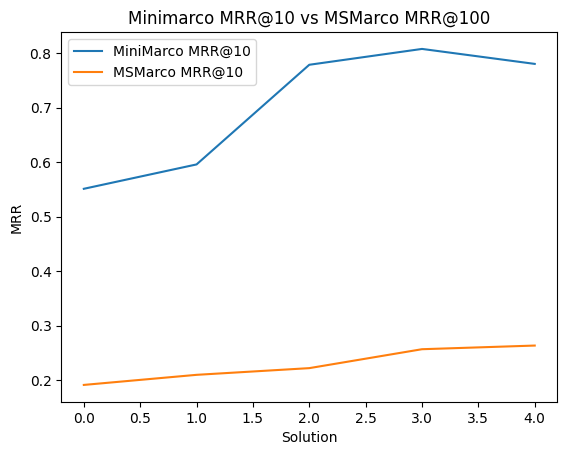

In [65]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(minimarco_mrr10_sorted)), minimarco_mrr10_sorted, label='MiniMarco MRR@10')
plt.plot(np.arange(len(msmarco_mrr100_sorted)), msmarco_mrr100_sorted, label='MSMarco MRR@10')

plt.title('Minimarco MRR@10 vs MSMarco MRR@100')
plt.xlabel('Solution')
plt.ylabel('MRR')
plt.legend()
